Spectrum modeling of DA white-dwarf:
SDSS J104341.53+085558.2

From reference(Gentile Fusillo et al. 2021): \
Teff: 15942 [K] \
logg: 7.93 [cgs]

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.io import ascii
from astropy.table import Table, join, vstack
from astropy import units as u
from astropy import constants as const
from scipy import interpolate

import glob
from pathlib import Path

Distance =  169.3795626619692 pc 
 Distance should be in pc 

     wl         flux         err     
----------- ------------ ------------
 3599.97876 8.474912e-16 8.075519e-17
3600.808838 1.097931e-15 7.698804e-17
3601.637207 8.113583e-16  7.48711e-17
3602.467773 1.037143e-15 7.837313e-17
3603.296387 1.141851e-15  7.80536e-17
3604.125244 9.169689e-16 7.773432e-17
3604.956543 1.186592e-15 7.542554e-17
3605.785889 7.327618e-16 8.726378e-17
3606.617188 7.871612e-16 8.058188e-17
3607.447021 1.026984e-15 9.607851e-17
        ...          ...          ...
8279.420898 1.137335e-16 6.461523e-18
8281.330078 1.124299e-16 7.430305e-18
8283.235352 1.050845e-16 7.572671e-18
8285.141602 1.037606e-16 7.435046e-18
8287.051758 1.114583e-16 6.463245e-18
8288.958008 1.023674e-16 6.208299e-18
8290.869141 1.168383e-16 7.561001e-18
8292.777344 1.117425e-16 6.699804e-18
8294.689453 1.054821e-16 6.238898e-18
8296.597656  1.16023e-16 4.770075e-18
8298.505859 1.133393e-16 6.023499e-18
Length = 3628 rows


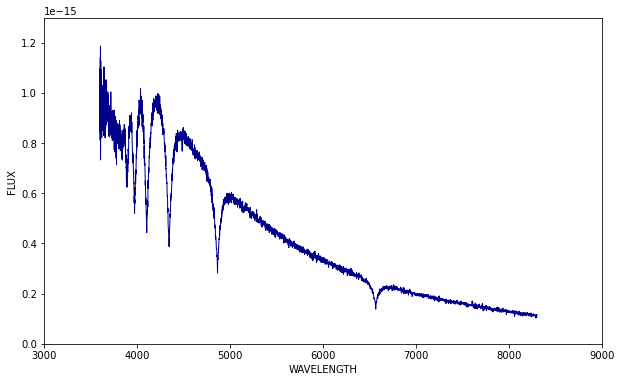

In [2]:
# Set distance for object

dist = (5.9039*1e-3*u.arcsec).to(u.parsec, equivalencies=u.parallax())
print('Distance = ', dist, '\n',
      'Distance should be in pc', '\n')

# Spectrum data
spec = Table.read('da.dat', format='ascii')
print(spec)

wl   = spec['wl']
flux = spec['flux']
err  = spec['err']

# Plot Spectrum
plt.figure(figsize=(10, 6))
plt.plot(spec['wl'], spec['flux'], ls='-', lw=1, c='darkblue')
plt.xlim(3000,9000)
plt.ylim(0, 1.3e-15)
plt.xlabel('WAVELENGTH')
plt.ylabel('FLUX')
plt.show()

In [3]:
# WD Spectrum Grid File
wd_grid = np.load('./wd_grid_koester_9000-40000_650-900.npy',
                  encoding = 'latin1', 
                  allow_pickle=True)

print(np.shape(wd_grid))
print(wd_grid)

(4,)
[array([ 9000.,  9250.,  9500.,  9750., 10000., 10250., 10500., 10750.,
       11000., 11250., 11500., 11750., 12000., 12250., 12500., 12750.,
       13000., 13250., 13500., 13750., 14000., 14250., 14500., 14750.,
       15000., 15250., 15500., 15750., 16000., 16250., 16500., 16750.,
       17000., 17250., 17500., 17750., 18000., 18250., 18500., 18750.,
       19000., 19250., 19500., 19750., 20000., 21000., 22000., 23000.,
       24000., 25000., 26000., 27000., 28000., 29000., 30000., 32000.,
       34000., 35000., 36000., 38000., 40000.,  9000.,  9250.,  9500.,
        9750., 10000., 10250., 10500., 10750., 11000., 11250., 11500.,
       11750., 12000., 12250., 12500., 12750., 13000., 13250., 13500.,
       13750., 14000., 14250., 14500., 14750., 15000., 15250., 15500.,
       15750., 16000., 16250., 16500., 16750., 17000., 17250., 17500.,
       17750., 18000., 18250., 18500., 18750., 19000., 19250., 19500.,
       19750., 20000., 21000., 22000., 23000., 24000., 25000., 26000.,


In [4]:
mrr_bg = Table.read('./Bergeron_mrr/Bergeron_DA.dat', format='ascii', delimiter=' ')
mrr_bg = np.array([mrr_bg['Teff'], mrr_bg['logg'], mrr_bg['M/Mo']])

tmp = np.where((mrr_bg[0,:] >= 9000) & (mrr_bg[0,:] <= 40000) & (mrr_bg[1,:] <= 9))
mrr_bg = [mrr_bg[0, tmp[0]], mrr_bg[1, tmp[0]], mrr_bg[2, tmp[0]]]

print(np.shape(mrr_bg))
print(mrr_bg)

(3, 110)
[array([ 9000.,  9500., 10000., 10500., 11000., 11500., 12000., 12500.,
       13000., 13500., 14000., 14500., 15000., 15500., 16000., 16500.,
       17000., 20000., 25000., 30000., 35000., 40000.,  9000.,  9500.,
       10000., 10500., 11000., 11500., 12000., 12500., 13000., 13500.,
       14000., 14500., 15000., 15500., 16000., 16500., 17000., 20000.,
       25000., 30000., 35000., 40000.,  9000.,  9500., 10000., 10500.,
       11000., 11500., 12000., 12500., 13000., 13500., 14000., 14500.,
       15000., 15500., 16000., 16500., 17000., 20000., 25000., 30000.,
       35000., 40000.,  9000.,  9500., 10000., 10500., 11000., 11500.,
       12000., 12500., 13000., 13500., 14000., 14500., 15000., 15500.,
       16000., 16500., 17000., 20000., 25000., 30000., 35000., 40000.,
        9000.,  9500., 10000., 10500., 11000., 11500., 12000., 12500.,
       13000., 13500., 14000., 14500., 15000., 15500., 16000., 16500.,
       17000., 20000., 25000., 30000., 35000., 40000.]), array([7. 

In [5]:
'''
# WD Spectrum Grid File
def read_models(wd_grid):
    x = []
    for data in sorted(glob.glob(str(wd_grid))):
        x.append(np.load(data, encoding = 'latin1', allow_pickle=True))
       
    grid_data = np.hstack(x)
   
    return grid_data

file_model = Path('./wd_grid_koester_9000-40000_650-900.npy')
grid_data = read_models(file_model)
teff_model, lg_model, w_grid, f_grid = grid_data
print(grid_data)
'''

"\n# WD Spectrum Grid File\ndef read_models(wd_grid):\n    x = []\n    for data in sorted(glob.glob(str(wd_grid))):\n        x.append(np.load(data, encoding = 'latin1', allow_pickle=True))\n       \n    grid_data = np.hstack(x)\n   \n    return grid_data\n\nfile_model = Path('./wd_grid_koester_9000-40000_650-900.npy')\ngrid_data = read_models(file_model)\nteff_model, lg_model, w_grid, f_grid = grid_data\nprint(grid_data)\n"

In [6]:
def model(teff_wd, logg, wl, dist):
    
    Teff_grid, logg_grid, w_grid, f_grid = wd_grid
    #print(teff_wd, logg)
    
    # Interpolate WD model
    # logg resolution = 0.25
    # Teff resolution = 250
    cut = np.where(( (logg_grid >= logg-0.25)    & (logg_grid <= logg+0.25) ) &
                   ( (Teff_grid >= teff_wd-250.) & (Teff_grid <= teff_wd+250.) ))
     
    xi = np.c_[Teff_grid.ravel(), logg_grid.ravel()]
    xi = xi[cut]
    f_grid = f_grid[cut]
    
    grid_spec = interpolate.griddata(xi, f_grid, (teff_wd, logg), method = 'linear')
    y_intp = interpolate.interp1d(w_grid, grid_spec, kind='slinear')(wl)
    
    # Interpolate Mass-Radius Relationship
    Teff_bg, logg_bg, mass_bg = mrr_bg
    
    if teff_wd < 17000.:
        cut2 = np.where(( (Teff_bg >= teff_wd-500.) & (Teff_bg <= teff_wd+500.) ) &
                        ( (logg_bg >= logg-0.5)     & (logg_bg <= logg+0.5) ))
    if ((teff_wd >= 17000.) & (teff_wd <= 20000.)):
        cut2 = np.where(( (Teff_bg >= 17000.)   & (Teff_bg <= 20000.) ) &
                        ( (logg_bg >= logg-0.5) & (logg_bg <= logg+0.5) ))
    if teff_wd > 20000.:
        cut2 = np.where(( (Teff_bg >= teff_wd-5000.) & (Teff <= teff_wd+5000.) ) &
                        ( (logg_bg >= logg-0.5)      & (logg_bg <= logg+0.5) ))
    
    xi2 = np.c_[Teff_bg.ravel(), logg_bg.ravel()]
    xi2 = xi2[cut2]
    mass_bg = mass_bg[cut2]
    
    mass_intp = interpolate.griddata(xi2, mass_bg, (teff_wd, logg), method = 'linear')
    
    # Compute scaling_factor
    G = const.G; R_sun = const.R_sun
    mass_intp = const.M_sun.cgs * mass_intp
    
    #r = 10**(0.5*(np.log10((G.cgs * mass_intp).value) - logg)) / (R_sun.cgs.to('pc').value)
    r = 10**(0.5*(np.log10((G.cgs * mass_intp).value) - logg)) # put in cm
    r = (r/100. * u.meter).to('pc')                            # put in pc
    
    scaling_factor = (r.value / dist.value)**2 # <====== May or may not be a 4 pi here
    
    #print('Radius in R_sun =', r.to('m')/R_sun)
    
    y_intp = scaling_factor * y_intp
    
    return y_intp

In [7]:
def log_likelihood(theta, wl, flux, err, dist):
    Teff, logg = theta
    model_step = model(Teff, logg, wl, dist)
    sigma2 = err**2
    return -0.5 * np.sum((flux - model_step)**2 / sigma2)

In [8]:
def log_prior(theta):
    Teff, logg = theta
    if 9000.0 < Teff < 20000.0 and 7. < logg < 9.:
        return 0.0
    return -np.inf

In [9]:
def log_probability(theta, wl, flux, err, dist):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, wl, flux, err, dist)

     wl         flux         err     
----------- ------------ ------------
 3599.97876 8.474912e-16 8.075519e-17
3600.808838 1.097931e-15 7.698804e-17
3601.637207 8.113583e-16  7.48711e-17
3602.467773 1.037143e-15 7.837313e-17
3603.296387 1.141851e-15  7.80536e-17
3604.125244 9.169689e-16 7.773432e-17
3604.956543 1.186592e-15 7.542554e-17
3605.785889 7.327618e-16 8.726378e-17
3606.617188 7.871612e-16 8.058188e-17
3607.447021 1.026984e-15 9.607851e-17
        ...          ...          ...
8279.420898 1.137335e-16 6.461523e-18
8281.330078 1.124299e-16 7.430305e-18
8283.235352 1.050845e-16 7.572671e-18
8285.141602 1.037606e-16 7.435046e-18
8287.051758 1.114583e-16 6.463245e-18
8288.958008 1.023674e-16 6.208299e-18
8290.869141 1.168383e-16 7.561001e-18
8292.777344 1.117425e-16 6.699804e-18
8294.689453 1.054821e-16 6.238898e-18
8296.597656  1.16023e-16 4.770075e-18
8298.505859 1.133393e-16 6.023499e-18
Length = 3628 rows


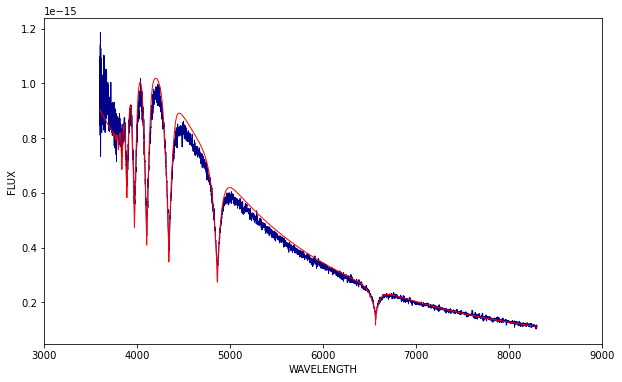

In [24]:
# Spectrum data with Guess numbers
spec = Table.read('da.dat', format='ascii')
print(spec)

guess_mean = 15000.1, 7.9

wl   = spec['wl']
flux = spec['flux']
err  = spec['err']

flux_model = model(guess_mean[0], guess_mean[1], wl, dist)

# Plot Spectrum
plt.figure(figsize=(10, 6))
plt.plot(spec['wl'], spec['flux'], ls='-', lw=1, c='darkblue')
plt.plot(wl, flux_model, ls='-', lw=1, c='r')
plt.xlim(3000,9000)
#plt.ylim(0, 1.3e-15)
plt.xlabel('WAVELENGTH')
plt.ylabel('FLUX')
plt.show()

In [12]:
import emcee

guess_mean = 15000.1, 7.9 # guess can't be in the grid
guess_std  = 500, 0.05
nwalkers = 100
ndim = 2

pos = [np.random.normal(guess_mean, guess_std) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability, args=(wl, flux, err, dist)
)
sampler.run_mcmc(pos, 3000, progress=True);

100%|██████████| 3000/3000 [11:11<00:00,  4.47it/s]


Steps stable after: [28.56678263 28.13375619]


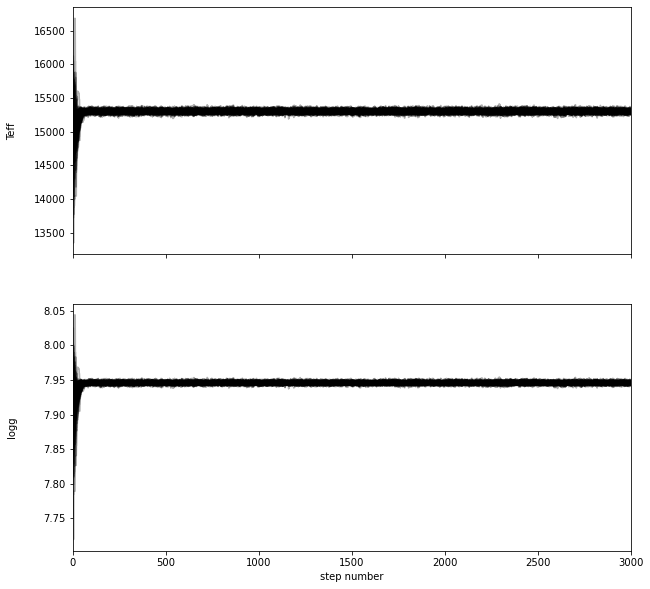

In [13]:
fig, axes = plt.subplots(2, figsize=(10, 10), sharex=True)
samples = sampler.get_chain()
labels = ["Teff", "logg", "Scaling_factor"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

tau = sampler.get_autocorr_time()
print('Steps stable after:', tau)

In [14]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

print(flat_samples[:,0])
#flat_samples = flat_samples[flat_samples[:,0] > 14000.]
#flat_samples = flat_samples[flat_samples[:,1] > 7.8]

[15319.4752551  15321.54124451 15333.86241375 ... 15315.44912367
 15340.6030941  15316.34441801]


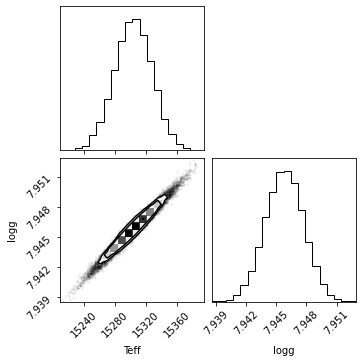

In [15]:
import corner

fig = corner.corner(flat_samples, labels=labels)

In [16]:
from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [17]:
Teff           = np.percentile(flat_samples[:, 0], 50)
logg           = np.percentile(flat_samples[:, 1], 50)
print(Teff, logg)

15303.83406474456 7.945807365889081


     wl         flux         err     
----------- ------------ ------------
 3599.97876 8.474912e-16 8.075519e-17
3600.808838 1.097931e-15 7.698804e-17
3601.637207 8.113583e-16  7.48711e-17
3602.467773 1.037143e-15 7.837313e-17
3603.296387 1.141851e-15  7.80536e-17
3604.125244 9.169689e-16 7.773432e-17
3604.956543 1.186592e-15 7.542554e-17
3605.785889 7.327618e-16 8.726378e-17
3606.617188 7.871612e-16 8.058188e-17
3607.447021 1.026984e-15 9.607851e-17
        ...          ...          ...
8279.420898 1.137335e-16 6.461523e-18
8281.330078 1.124299e-16 7.430305e-18
8283.235352 1.050845e-16 7.572671e-18
8285.141602 1.037606e-16 7.435046e-18
8287.051758 1.114583e-16 6.463245e-18
8288.958008 1.023674e-16 6.208299e-18
8290.869141 1.168383e-16 7.561001e-18
8292.777344 1.117425e-16 6.699804e-18
8294.689453 1.054821e-16 6.238898e-18
8296.597656  1.16023e-16 4.770075e-18
8298.505859 1.133393e-16 6.023499e-18
Length = 3628 rows


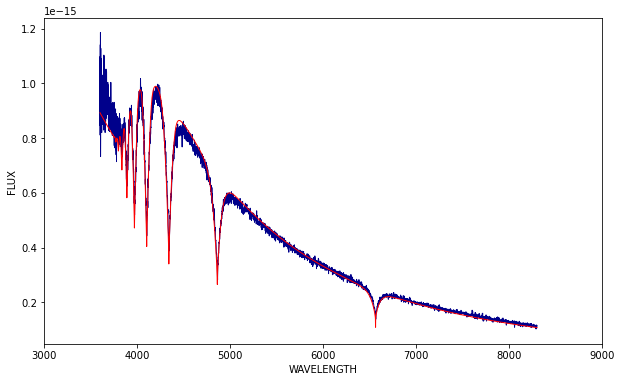

In [19]:
# Spectrum fit
da_spec = Table.read('da.dat', format='ascii')
print(da_spec)

wl   = spec['wl']
flux = spec['flux']
err  = spec['err']

flux_model = model(Teff, logg, wl, dist)

# Plot Spectrum
plt.figure(figsize=(10, 6))
plt.plot(spec['wl'], spec['flux'], ls='-', lw=1, c='darkblue')
plt.plot(wl, flux_model, ls='-', lw=1, c='r')
plt.xlim(3000,9000)
#plt.ylim(0, 1.3e-15)
plt.xlabel('WAVELENGTH')
plt.ylabel('FLUX')
plt.show()

In [20]:
import cowsay
print(cowsay.char_names)
cowsay.cheese('Thats a funny spectrum')

dict_keys(['beavis', 'cheese', 'daemon', 'cow', 'dragon', 'ghostbusters', 'kitty', 'meow', 'milk', 'pig', 'stegosaurus', 'stimpy', 'trex', 'turkey', 'turtle', 'tux'])
  ______________________
| Thats a funny spectrum |
                      \
                       \
                        \
                         \
                           /     \_/         |
                          |                 ||
                          |                 ||
                         |    ###\  /###   | |
                         |     0  \/  0    | |
                        /|                 | |
                       / |        <        |\ \
                      | /|                 | | |
                      | |     \_______/   |  | |
                      | |                 | / /
                      /||                 /|||
                         ----------------|
                              | |    | |
                              ***    ***
                             /_